In [16]:
import numpy as np
import pandas as pd
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format, dollar_format

In [17]:
bookings = pd.read_excel('bookings.xlsx').dropna()
bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    33 non-null     datetime64[ns]
 1   In-Person               33 non-null     float64       
 2   Remote                  33 non-null     float64       
 3   Remote and Meetingless  33 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 KB


In [18]:
stacked_rev = bookings.melt(id_vars=['Date'], value_vars=['In-Person', 'Remote', 'Remote and Meetingless'],
                           var_name='Sales Process', value_name='Bookings')
stacked_rev['Bookings'] = stacked_rev['Bookings']/1000000

In [19]:
p = (ggplot(stacked_rev)
+ aes(x="Date", y="Bookings", group='Sales Process', color='Sales Process')
+ scale_y_continuous(labels=dollar_format(prefix='', digits=0, big_mark=',', suffix='M'))
+ scale_x_datetime(breaks=date_breaks('6 months'), labels=date_format('%b-%y'))
+ xlab('Time')
+ ylab('Bookings')
+ theme_xkcd()
+ geom_line(size=1.2))

/Users/dmitri/Projects/SalesDataGen/venv/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/dmitri/Projects/SalesDataGen/venv/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: simulation_results.png


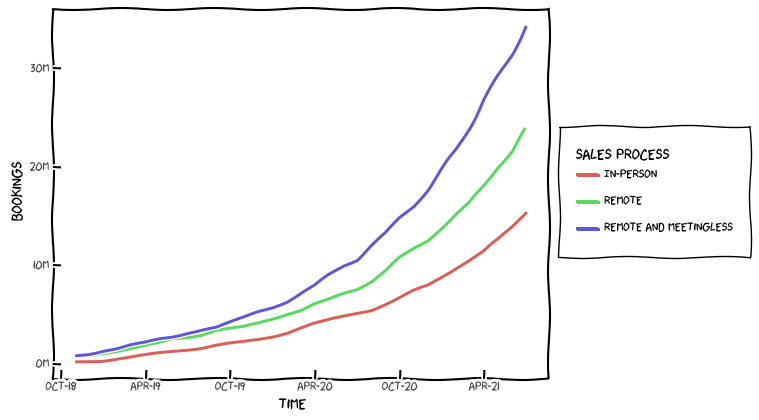

<ggplot: (339711835)>

In [20]:
ggsave(plot=p, filename='simulation_results.png', dpi=600)
p